# Machine learning - regression project

The main goal of the project is to create 3 machine learning models predicting the price of cars and to compare these models with each other.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

## Cleaning the data

In [25]:
# Reading the data
df = pd.read_csv('cars.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [26]:
df = df.replace('?', np.nan)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [28]:
#Due to the large number of NaNs, I am removing the column 'normalized-losses'
df_cleaned = df.drop(columns='normalized-losses')

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       203 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

There are still NaNs in columns: num-of-doors, bore, stroke, horsepower, peak-rpm, price

In [30]:
#Rows anc columns with NaNs
display(df_cleaned[df_cleaned.isna().any(axis=1)][['num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price' ]])

,num-of-doors,bore,stroke,horsepower,peak-rpm,price
9,two,3.13,3.4,160,5500,NaN
27,NaN,3.03,3.39,102,5500,8558
44,two,3.03,3.11,70,5400,NaN
45,four,3.03,3.11,70,5400,NaN
55,two,NaN,NaN,101,6000,10945
56,two,NaN,NaN,101,6000,11845
57,two,NaN,NaN,101,6000,13645
58,two,NaN,NaN,135,6000,15645
63,NaN,3.39,3.39,64,4650,10795
129,two,3.94,3.11,288,5750,NaN


In [31]:
# NaNs in 'num-of-doors' are filled with 'four' arbitrarily, 
#because I do not expect this feature to have a significant effect on the dependent variable
df_cleaned['num-of-doors'].fillna('four')
df_cleaned['num-of-doors'][27] = 'four'
df_cleaned['num-of-doors'][63] = 'four'

C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_5096\93202485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['num-of-doors'][27] = 'four'
C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_5096\93202485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['num-of-doors'][63] = 'four'


In [32]:
# replacing NaN in columns 'horsepower' and 'peak-rpm'
df_cleaned.loc[(df_cleaned['engine-size']>=130)&(df_cleaned['engine-size']<=134)&
               (df_cleaned['fuel-type']=='gas')&(df_cleaned['aspiration']=='std')]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [33]:
#for NaNs I'm using values from a car with same fuel-type and aspiration and similar engine-size
horsepower_rep = df_cleaned['horsepower'][0]

df_cleaned['horsepower'][130] = horsepower_rep
df_cleaned['horsepower'][131] = horsepower_rep

peak_rpm_rep = df_cleaned['peak-rpm'][0]

df_cleaned['peak-rpm'][130] = peak_rpm_rep
df_cleaned['peak-rpm'][131] = peak_rpm_rep

C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_5096\1565801033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['horsepower'][130] = horsepower_rep
C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_5096\1565801033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['horsepower'][131] = horsepower_rep
C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_5096\1565801033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [34]:
# bore & stroke depent od compression-ratio so I drop these columns
df_cleaned.drop(columns=['bore', 'stroke'], inplace=True)

In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [36]:
#Splitting columns into numeric and categorical variables
numerical_columns = ['length','width','height','curb-weight','wheel-base',
                  'engine-size','compression-ratio','horsepower','peak-rpm', 'city-mpg','highway-mpg','price']
categorical_columns = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                       'engine-type', 'num-of-cylinders', 'fuel-system']

In [37]:
#casting numerical data to float
for col in numerical_columns:
  df_cleaned[col] = df_cleaned[col].astype(float)

### Categorical variables

In [38]:
# categorical variables
label = preprocessing.LabelEncoder()
df_cleaned_cat = pd.DataFrame()

# df_numerical = df_cleaned.drop(categorical_columns, axis=1)
for i in categorical_columns:
  df_cleaned_cat[i]=label.fit_transform(df[i])

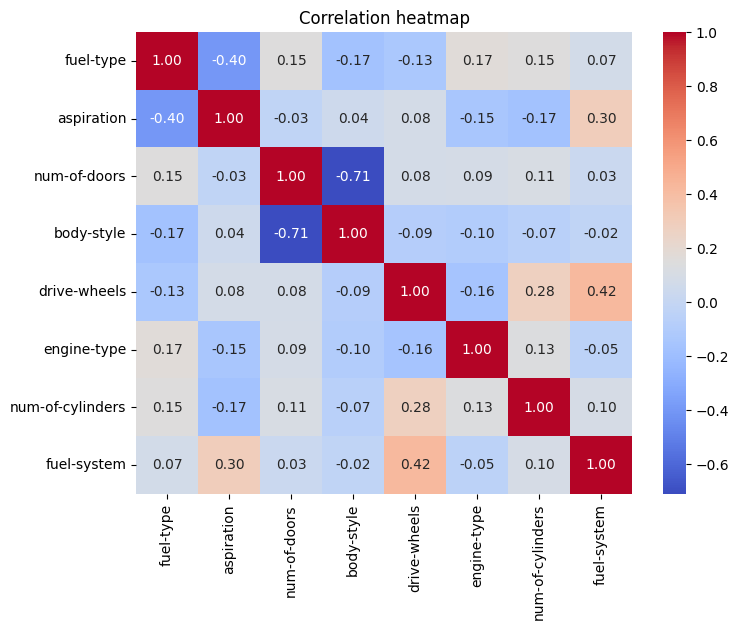

In [39]:
correlation_matrix = df_cleaned_cat.corr(method='spearman')

# Creating correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [40]:
#As there is a strong relationship between body-style and num-of-doors, I'm dropping col 'num-of-doors'. 
#It is less diversified than 'body-style'
df_cleaned_cat = df_cleaned_cat.drop(['num-of-doors'], axis=1)

### Numerical variables

In [41]:
df_cleaned_num = df_cleaned[numerical_columns]

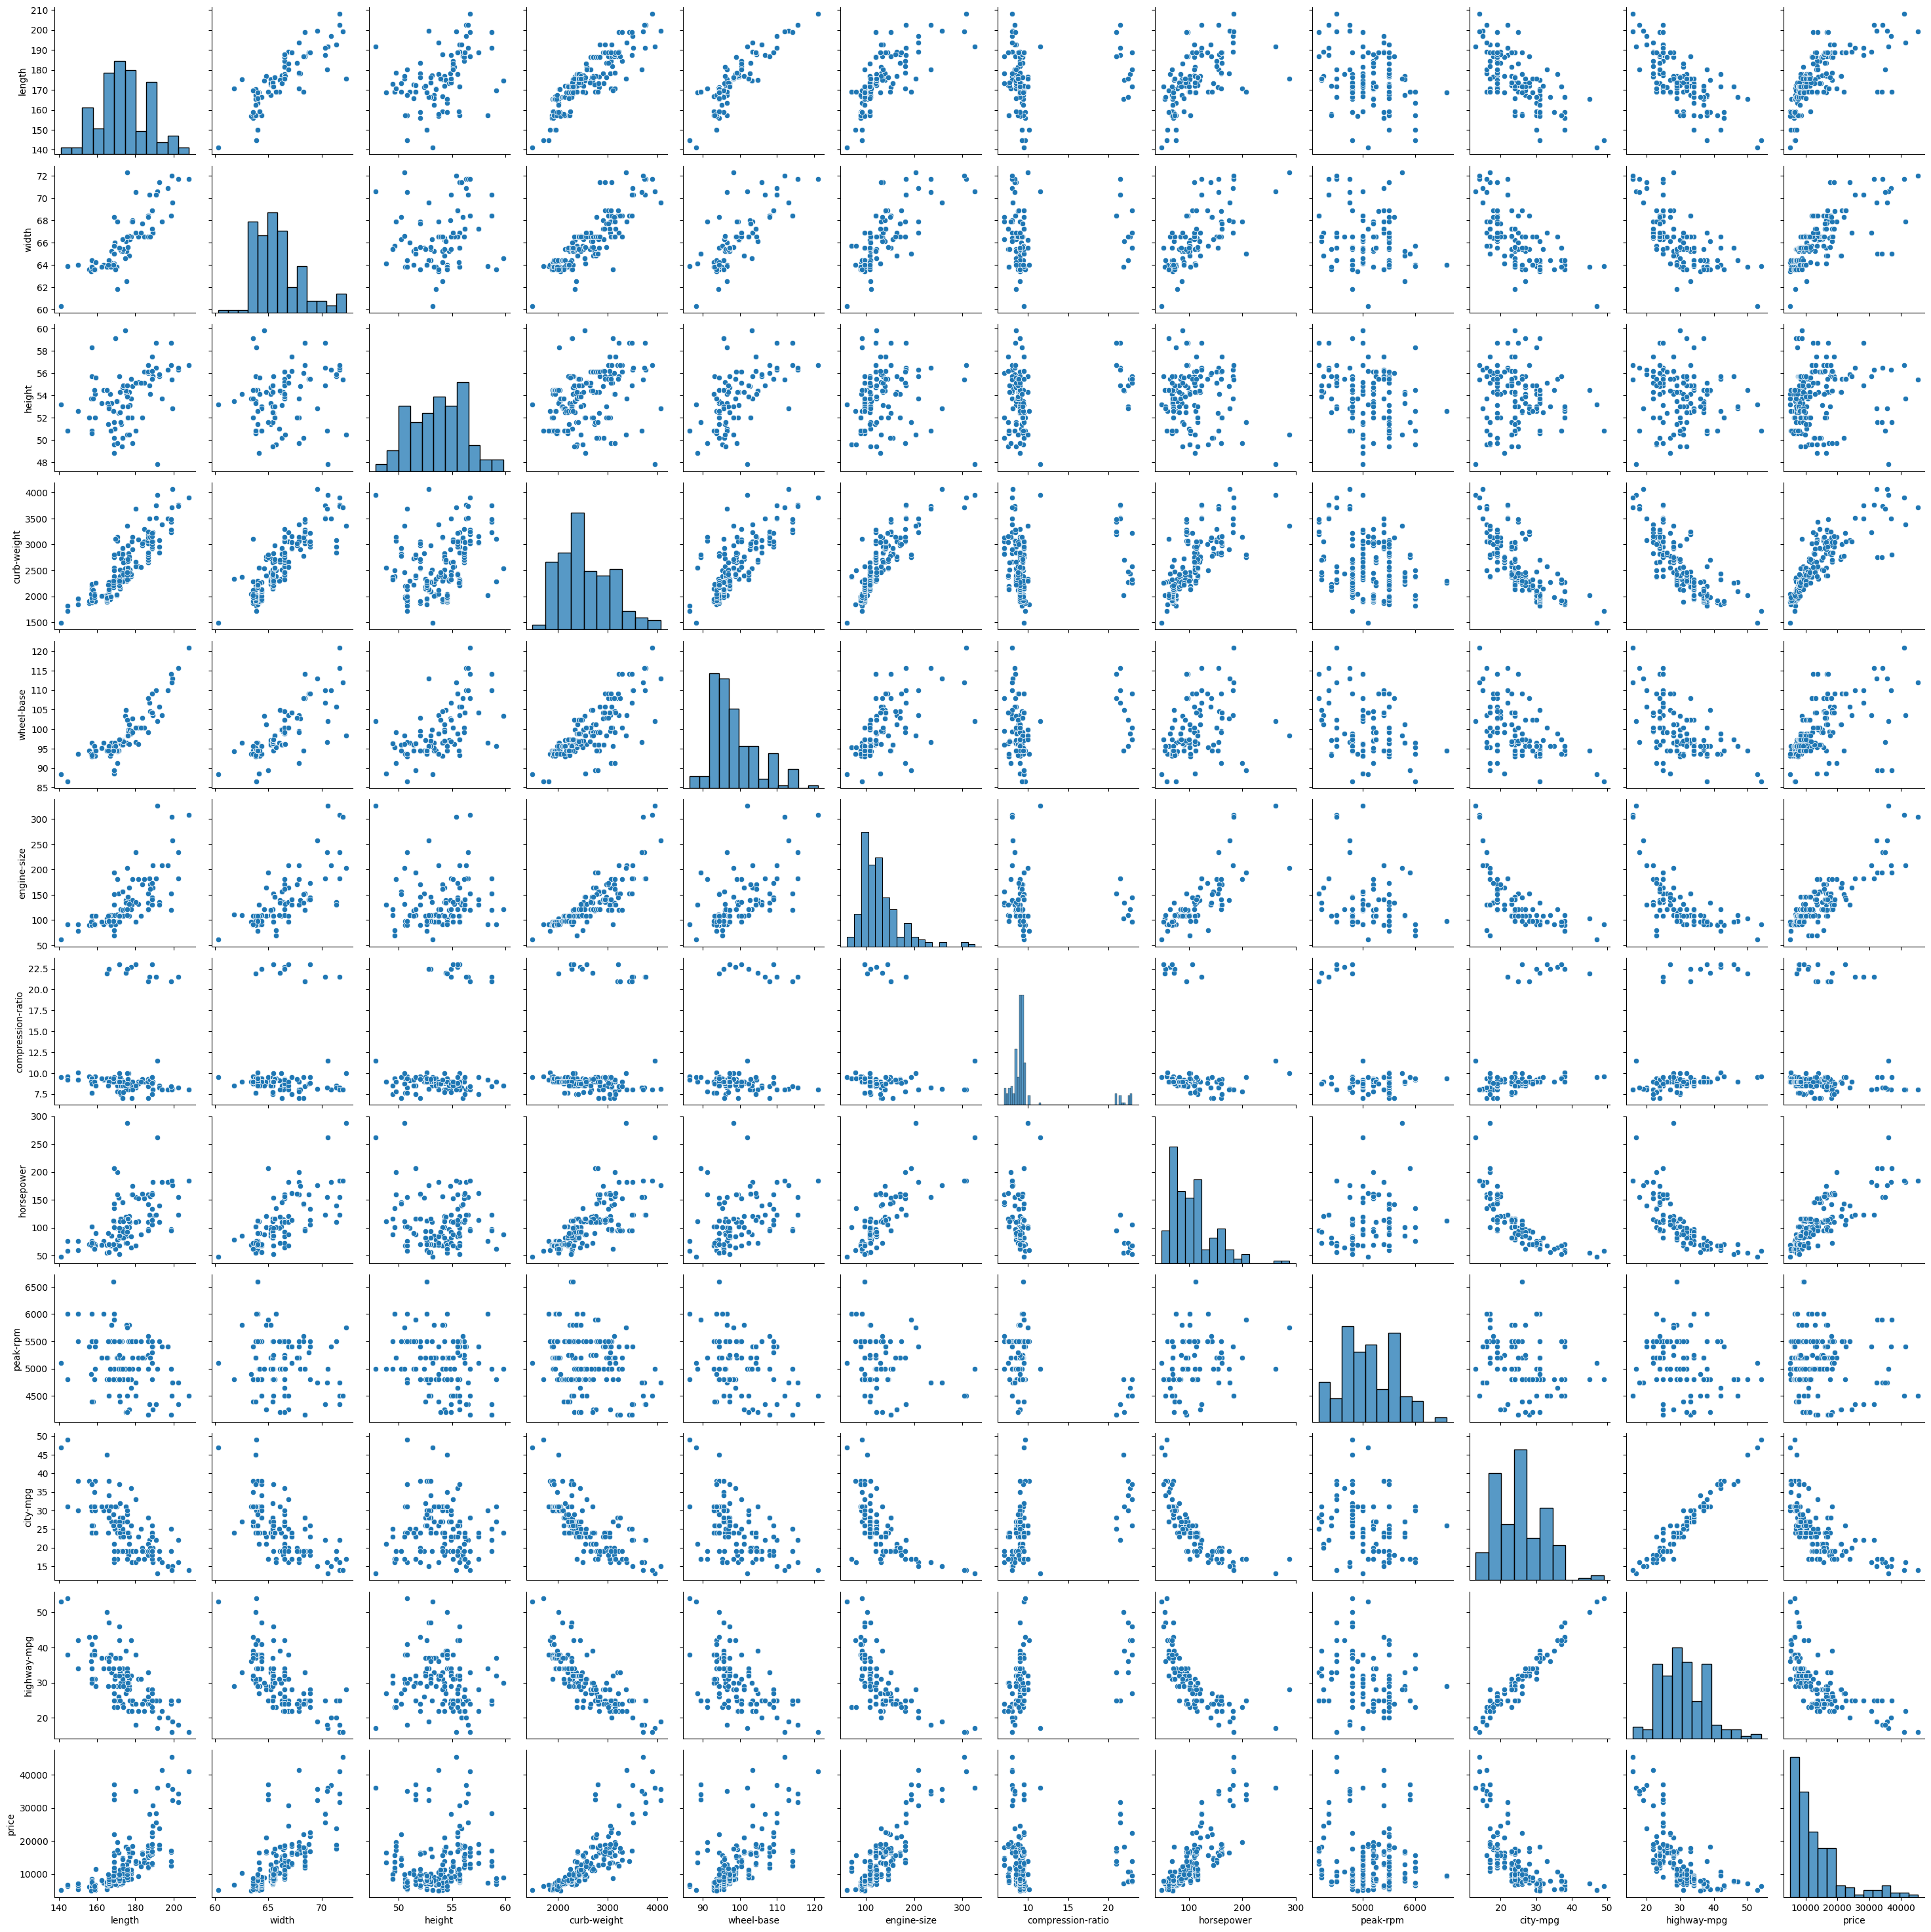

In [42]:
sns.pairplot(df_cleaned_num)

There is a strong relationship between city-mpg and highway-mpg. It may be worth considering to remove one of these columns.
The relationship between engine-size and price seems to be linear.

In [23]:
df_cleaned.drop(columns=['highway-mpg'], inplace=True)

#Updating the list of numerical columns
numerical_columns = ['length','width','height','curb-weight','wheel-base',
                  'engine-size','compression-ratio','horsepower','peak-rpm', 'city-mpg', 'price']

In [43]:
df_cleaned_num.describe()

,length,width,height,curb-weight,wheel-base,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,174.049268,65.907805,53.724878,2555.565854,98.756585,126.907317,10.142537,104.321951,5124.146341,25.219512,30.751220,13207.129353
std,12.337289,2.145204,2.443522,520.680204,6.021776,41.642693,3.972040,39.524797,477.139021,6.542142,6.886443,7947.066342
min,141.100000,60.300000,47.800000,1488.000000,86.600000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,166.300000,64.100000,52.000000,2145.000000,94.500000,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,173.200000,65.500000,54.100000,2414.000000,97.000000,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,183.100000,66.900000,55.500000,2935.000000,102.400000,141.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,208.100000,72.300000,59.800000,4066.000000,120.900000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [44]:
#connecting categorical and numerical variables
display(df_cleaned_cat)
display(df_cleaned_num)

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system
0,1,0,0,2,0,2,5
1,1,0,0,2,0,2,5
2,1,0,2,2,5,3,5
3,1,0,3,1,3,2,5
4,1,0,3,0,3,1,5
...,...,...,...,...,...,...,...
200,1,0,3,2,3,2,5
201,1,1,3,2,3,2,5
202,1,0,3,2,5,3,5
203,0,1,3,2,3,3,3


,length,width,height,curb-weight,wheel-base,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,168.8,64.1,48.8,2548.0,88.6,130.0,9.0,111.0,5000.0,21.0,27.0,13495.0
1,168.8,64.1,48.8,2548.0,88.6,130.0,9.0,111.0,5000.0,21.0,27.0,16500.0
2,171.2,65.5,52.4,2823.0,94.5,152.0,9.0,154.0,5000.0,19.0,26.0,16500.0
3,176.6,66.2,54.3,2337.0,99.8,109.0,10.0,102.0,5500.0,24.0,30.0,13950.0
4,176.6,66.4,54.3,2824.0,99.4,136.0,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952.0,109.1,141.0,9.5,114.0,5400.0,23.0,28.0,16845.0
201,188.8,68.8,55.5,3049.0,109.1,141.0,8.7,160.0,5300.0,19.0,25.0,19045.0
202,188.8,68.9,55.5,3012.0,109.1,173.0,8.8,134.0,5500.0,18.0,23.0,21485.0
203,188.8,68.9,55.5,3217.0,109.1,145.0,23.0,106.0,4800.0,26.0,27.0,22470.0


In [45]:
df = pd.concat([df_cleaned_cat,df_cleaned_num], axis = 1)

In [46]:
df

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,length,width,height,curb-weight,wheel-base,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,0,0,2,0,2,5,168.8,64.1,48.8,2548.0,88.6,130.0,9.0,111.0,5000.0,21.0,27.0,13495.0
1,1,0,0,2,0,2,5,168.8,64.1,48.8,2548.0,88.6,130.0,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,0,2,2,5,3,5,171.2,65.5,52.4,2823.0,94.5,152.0,9.0,154.0,5000.0,19.0,26.0,16500.0
3,1,0,3,1,3,2,5,176.6,66.2,54.3,2337.0,99.8,109.0,10.0,102.0,5500.0,24.0,30.0,13950.0
4,1,0,3,0,3,1,5,176.6,66.4,54.3,2824.0,99.4,136.0,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,3,2,5,188.8,68.9,55.5,2952.0,109.1,141.0,9.5,114.0,5400.0,23.0,28.0,16845.0
201,1,1,3,2,3,2,5,188.8,68.8,55.5,3049.0,109.1,141.0,8.7,160.0,5300.0,19.0,25.0,19045.0
202,1,0,3,2,5,3,5,188.8,68.9,55.5,3012.0,109.1,173.0,8.8,134.0,5500.0,18.0,23.0,21485.0
203,0,1,3,2,3,3,3,188.8,68.9,55.5,3217.0,109.1,145.0,23.0,106.0,4800.0,26.0,27.0,22470.0


In [47]:
initial_df = pd.read_csv('cars.csv')
brand = pd.get_dummies(initial_df['make'])

In [48]:
df = pd.concat([df,brand], axis = 1)

In [49]:
df

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,length,width,height,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,2,0,2,5,168.8,64.1,48.8,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,2,0,2,5,168.8,64.1,48.8,...,False,False,False,False,False,False,False,False,False,False
2,1,0,2,2,5,3,5,171.2,65.5,52.4,...,False,False,False,False,False,False,False,False,False,False
3,1,0,3,1,3,2,5,176.6,66.2,54.3,...,False,False,False,False,False,False,False,False,False,False
4,1,0,3,0,3,1,5,176.6,66.4,54.3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,3,2,5,188.8,68.9,55.5,...,False,False,False,False,False,False,False,False,False,True
201,1,1,3,2,3,2,5,188.8,68.8,55.5,...,False,False,False,False,False,False,False,False,False,True
202,1,0,3,2,5,3,5,188.8,68.9,55.5,...,False,False,False,False,False,False,False,False,False,True
203,0,1,3,2,3,3,3,188.8,68.9,55.5,...,False,False,False,False,False,False,False,False,False,True


In [50]:
#I write separately rows with NaN in the price column - I will use the created models for them to predict the price
df_price_na = df[df['price'].isna()]

In [51]:
df_price_na

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,length,width,height,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
9,1,1,2,0,3,1,5,178.2,67.9,52.0,...,False,False,False,False,False,False,False,False,False,False
44,1,0,3,1,3,2,1,155.9,63.6,52.0,...,False,False,False,False,False,False,False,False,False,False
45,1,0,3,1,3,2,1,155.9,63.6,52.0,...,False,False,False,False,False,False,False,False,False,False
129,1,0,2,2,1,0,5,175.7,72.3,50.5,...,False,False,False,True,False,False,False,False,False,False


In [52]:
df = df.dropna(subset=['price'])

In [53]:
df

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,length,width,height,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,2,0,2,5,168.8,64.1,48.8,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,2,0,2,5,168.8,64.1,48.8,...,False,False,False,False,False,False,False,False,False,False
2,1,0,2,2,5,3,5,171.2,65.5,52.4,...,False,False,False,False,False,False,False,False,False,False
3,1,0,3,1,3,2,5,176.6,66.2,54.3,...,False,False,False,False,False,False,False,False,False,False
4,1,0,3,0,3,1,5,176.6,66.4,54.3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,3,2,5,188.8,68.9,55.5,...,False,False,False,False,False,False,False,False,False,True
201,1,1,3,2,3,2,5,188.8,68.8,55.5,...,False,False,False,False,False,False,False,False,False,True
202,1,0,3,2,5,3,5,188.8,68.9,55.5,...,False,False,False,False,False,False,False,False,False,True
203,0,1,3,2,3,3,3,188.8,68.9,55.5,...,False,False,False,False,False,False,False,False,False,True


## Outliers

<Axes: xlabel='price', ylabel='Count'>

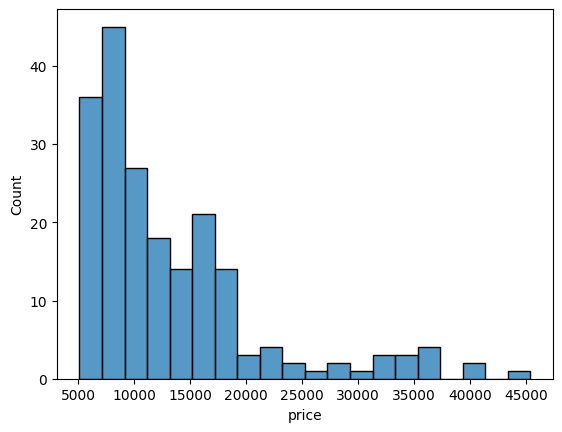

In [54]:
sns.histplot(df['price'], bins=20)

<Axes: >

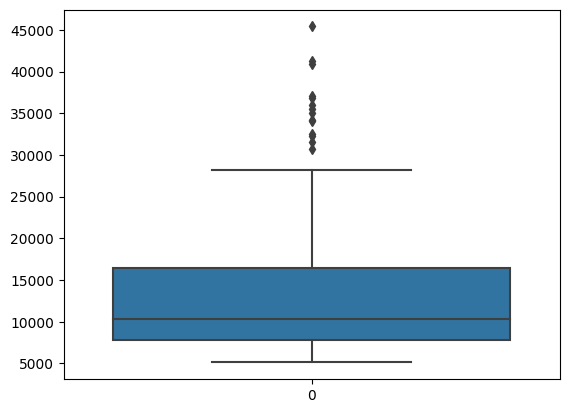

In [55]:
sns.boxplot(df['price'])

In [56]:
def remove_outliers_iqr(data_frame, columns, k=1.5):
    """
    Remove outliers from a pandas DataFrame using the IQR method.

    Parameters:
        data_frame (pd.DataFrame): The input DataFrame containing numerical data.
        columns (list): List of column names for which outliers should be removed.
        k (float, optional): The coefficient to control the threshold for identifying outliers.
                             The default value is 1.5.

    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """

    # Create a copy of the input DataFrame to avoid modifying the original data
    df_cleaned = data_frame.copy()

    for column in columns:
        # Calculate the first quartile (Q1) and the third quartile (Q3)
        q1 = df_cleaned[column].quantile(0.25)
        q3 = df_cleaned[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        iqr = q3 - q1

        # Define the upper and lower bounds for outlier detection
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Remove outliers that fall outside the upper and lower bounds
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

In [57]:
df = remove_outliers_iqr(df, ['price'])

<Axes: xlabel='price', ylabel='Count'>

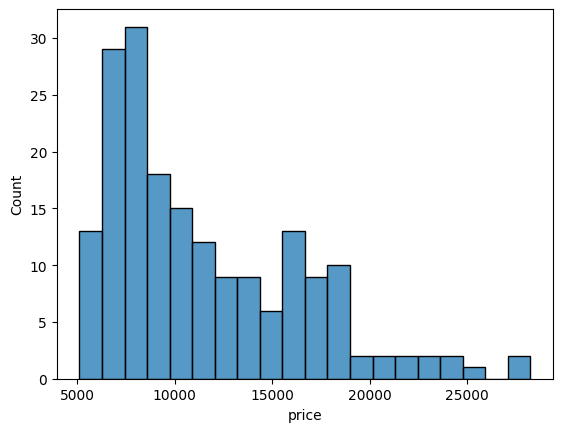

In [58]:
sns.histplot(df['price'], bins=20)

<Axes: >

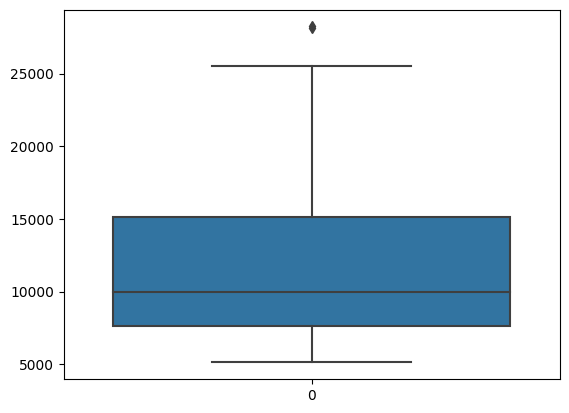

In [59]:
sns.boxplot(df['price'])

In [60]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 204
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel-type          187 non-null    int32  
 1   aspiration         187 non-null    int32  
 2   body-style         187 non-null    int32  
 3   drive-wheels       187 non-null    int32  
 4   engine-type        187 non-null    int32  
 5   num-of-cylinders   187 non-null    int32  
 6   fuel-system        187 non-null    int32  
 7   length             187 non-null    float64
 8   width              187 non-null    float64
 9   height             187 non-null    float64
 10  curb-weight        187 non-null    float64
 11  wheel-base         187 non-null    float64
 12  engine-size        187 non-null    float64
 13  compression-ratio  187 non-null    float64
 14  horsepower         187 non-null    float64
 15  peak-rpm           187 non-null    float64
 16  city-mpg           187 non-null

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,length,width,height,curb-weight,wheel-base,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.898396,0.187166,2.652406,1.283422,2.989305,2.133690,3.139037,172.963636,65.644920,53.783422,2483.262032,98.310160,118.652406,10.207059,97.411765,5118.449198,25.871658,31.449198,11503.176471
std,0.302938,0.391092,0.824381,0.538709,0.989131,0.694284,2.032511,11.324380,1.840265,2.434782,443.307984,5.308094,26.892299,4.040858,30.010508,473.853173,6.092883,6.380526,4979.406542
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,141.100000,60.300000,48.800000,1488.000000,86.600000,61.000000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,1.000000,0.000000,2.000000,1.000000,3.000000,2.000000,1.000000,166.300000,64.000000,52.000000,2134.000000,94.500000,97.000000,8.700000,70.000000,4800.000000,21.000000,26.000000,7649.000000
50%,1.000000,0.000000,3.000000,1.000000,3.000000,2.000000,3.000000,172.600000,65.400000,54.100000,2395.000000,96.500000,110.000000,9.000000,94.000000,5200.000000,25.000000,31.000000,9960.000000
75%,1.000000,0.000000,3.000000,2.000000,3.000000,2.000000,5.000000,178.450000,66.500000,55.500000,2823.500000,100.800000,136.000000,9.400000,114.000000,5500.000000,30.500000,36.500000,15145.000000
max,1.000000,1.000000,4.000000,2.000000,6.000000,6.000000,7.000000,198.900000,71.400000,59.800000,3750.000000,114.200000,183.000000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000


## Machine Learining

### 1 variable regression

In [61]:
# Dependent and independent variables
y = df['price']
X = df[['horsepower']]

X_price_na = df_price_na[['horsepower']]

In [62]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

# Split into training and validating datasets
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [67]:
reg_one_model = LinearRegression().fit(X_train, y_train)

pred_reg_one_val = reg_one_model.predict(X_val)
pred_reg_one_test = reg_one_model.predict(X_test)

print('Validation set')
print('R2 Score:')
print(r2_score(y_val, pred_reg_one_val))
print('MAE')
print(mean_absolute_error(y_val, pred_reg_one_val))

print()
print('Test set')
print('R2 Score:')
print(r2_score(y_test, pred_reg_one_test))
print('MAE')
print(mean_absolute_error(y_test, pred_reg_one_test))

print()
print('Prediction for unknown prices')
print(reg_one_model.predict(X_price_na))

Validation set
R2 Score:
0.5230982856116643
MAE
2794.2315726975326

Test set
R2 Score:
0.5425642737165288
MAE
2201.6976200081517

Prediction for unknown prices
[18149.47422389  8322.87211509  8322.87211509 32125.08611197]


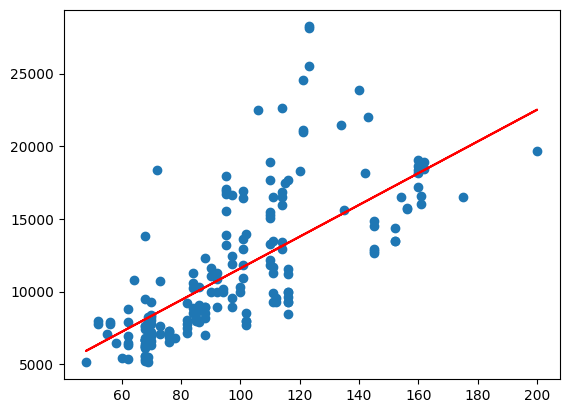

In [68]:
# Final model
plt.plot(df.horsepower, df.price, 'o')
plt.plot(df.horsepower, reg_one_model.intercept_ + df.horsepower*reg_one_model.coef_, 'r')
plt.show()

In [69]:
print(reg_one_model.intercept_)
print(reg_one_model.coef_)

679.9593637975358
[109.18446788]


### Multiple variables regression

In [70]:
# Dependent and independent variables
y = df['price']
X = df.drop(['price'], axis=1)

X_price_na = df_price_na.drop(['price'], axis=1)

In [71]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Split into training and validating datasets
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [72]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

pred_reg_val = reg_model.predict(X_val)
pred_reg_test = reg_model.predict(X_test)


print('Validation set')
print('R2 Score:')
print(r2_score(y_val, pred_reg_val))
print('MAE')
print(mean_absolute_error(y_val, pred_reg_val))

print()
print('Test set')
print('R2 Score:')
print(r2_score(y_test, pred_reg_test))
print('MAE')
print(mean_absolute_error(y_test, pred_reg_test))

print()
print('Prediction for unknown prices')
print(reg_model.predict(X_price_na))

Validation set
R2 Score:
0.7384715214513948
MAE
1656.7377034645403

Test set
R2 Score:
0.8546245252110469
MAE
1135.3552757335508

Prediction for unknown prices
[22434.57433548  6829.09247235  7093.35342392 23639.90786025]


### Decision trees

In [73]:
# Dependent and independent variables
y = df['price']
X = df.drop(['price'], axis=1)

In [74]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

# Split into training and validating datasets
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [75]:
tree_model = tree.DecisionTreeRegressor(min_samples_split=20, max_depth=5)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=20)

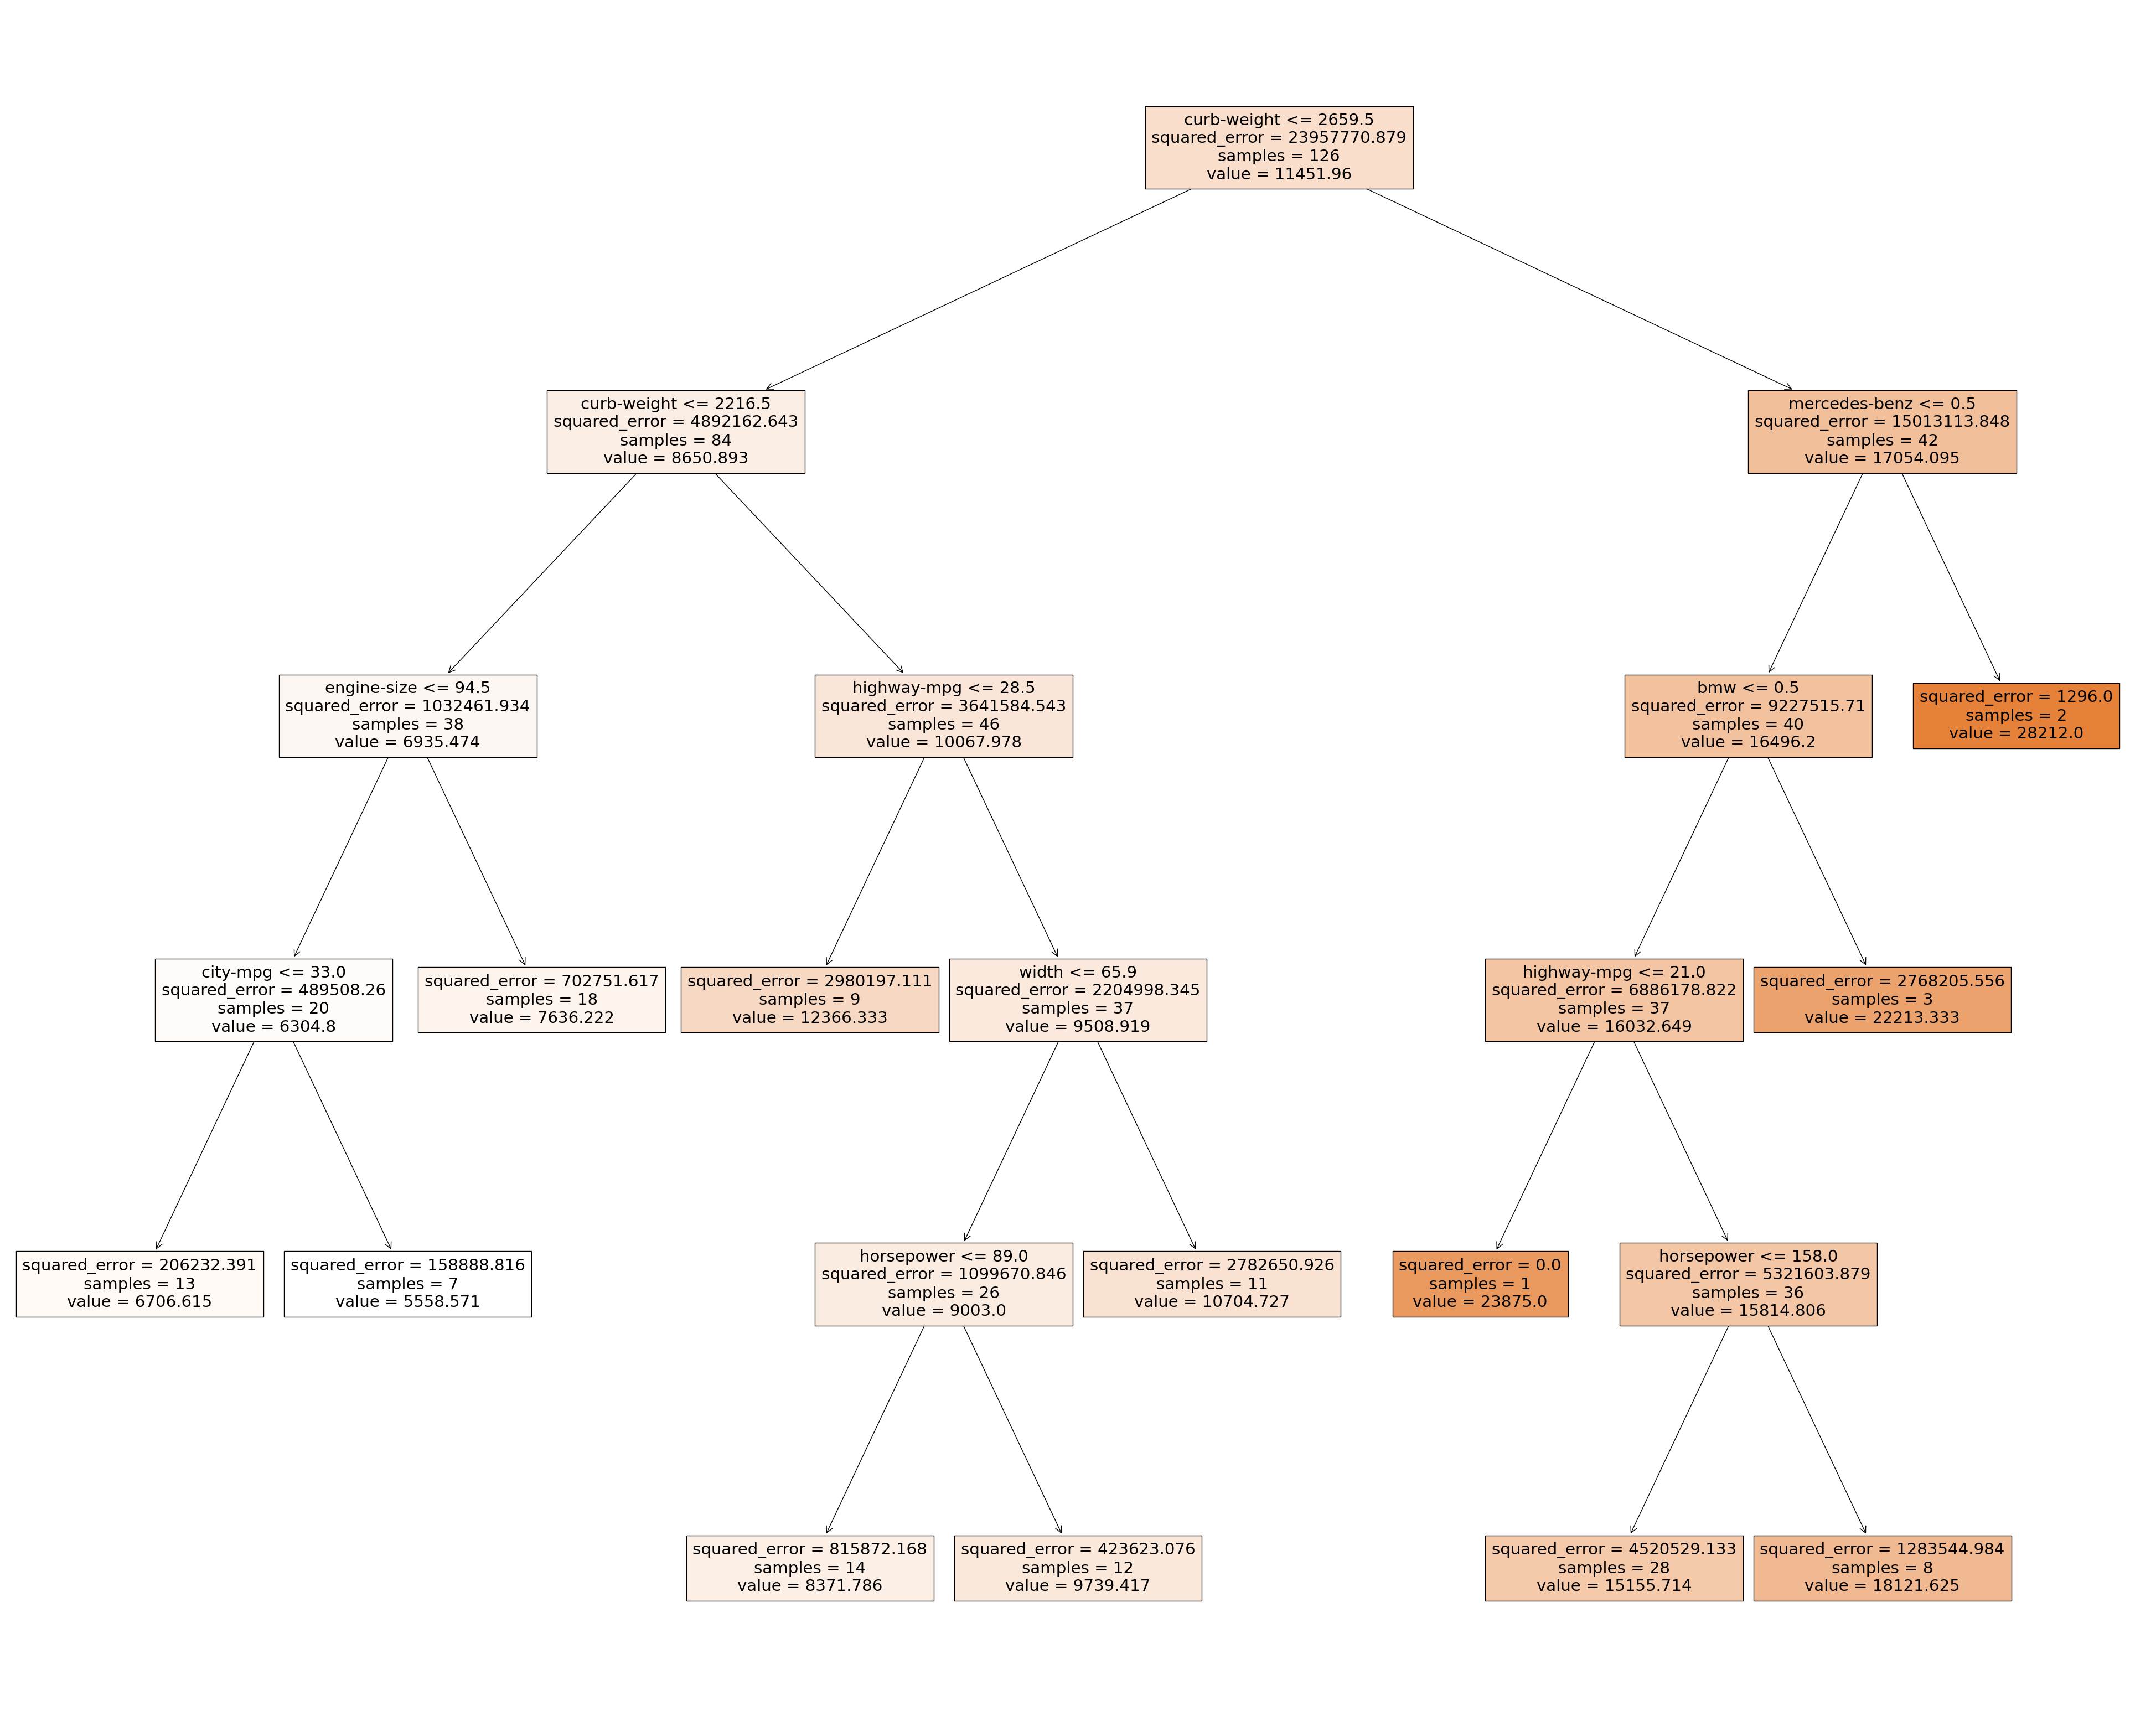

In [76]:
fig = plt.figure(figsize=(50,40), dpi=100)
tree_plot = tree.plot_tree(tree_model, feature_names=X.columns, filled=True)

In [77]:
# Checking the effectiveness of the model

pred_tree_val = tree_model.predict(X_val)     # Prediction for the training set - prediction for the observations that our model saw during training
pred_tree_test = tree_model.predict(X_test)       # Prediction for test set - prediction for observations that our model did NOT see during training

print('Validation set')
print('R2 Score:')
print(r2_score(y_val, pred_tree_val))
print('MAE')
print(mean_absolute_error(y_val, pred_tree_val))

print()
print('Test set')
print('R2 Score:')
print(r2_score(y_test, pred_tree_test))
print('MAE')
print(mean_absolute_error(y_test, pred_tree_test))

print()
print('Prediction for unknown prices')
print(tree_model.predict(X_price_na))

Validation set
R2 Score:
0.7168947106926249
MAE
1937.1921225475912

Test set
R2 Score:
0.6289515196711616
MAE
1707.0955739662638

Prediction for unknown prices
[18121.625       5558.57142857  5558.57142857 18121.625     ]


### Using GridSearch to find best tree model params

In [78]:
# Dependent and independent variables
y = df['price']
X = df.drop(['price'], axis=1)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

tree_model = tree.DecisionTreeRegressor()
# tree_model.fit(X_train, y_train)

gs = GridSearchCV(tree_model,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 60, 10)
                                },
                  cv=10,
                  scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [79]:
print(gs.best_params_)
print(-gs.best_score_)
max_depth = gs.best_params_['max_depth']
min_samples_split = gs.best_params_['min_samples_split']

{'max_depth': 8, 'min_samples_split': 10}
1595.045924076276


In [80]:
# Training the model, best params
tree_model_best = tree.DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
tree_model_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=10)

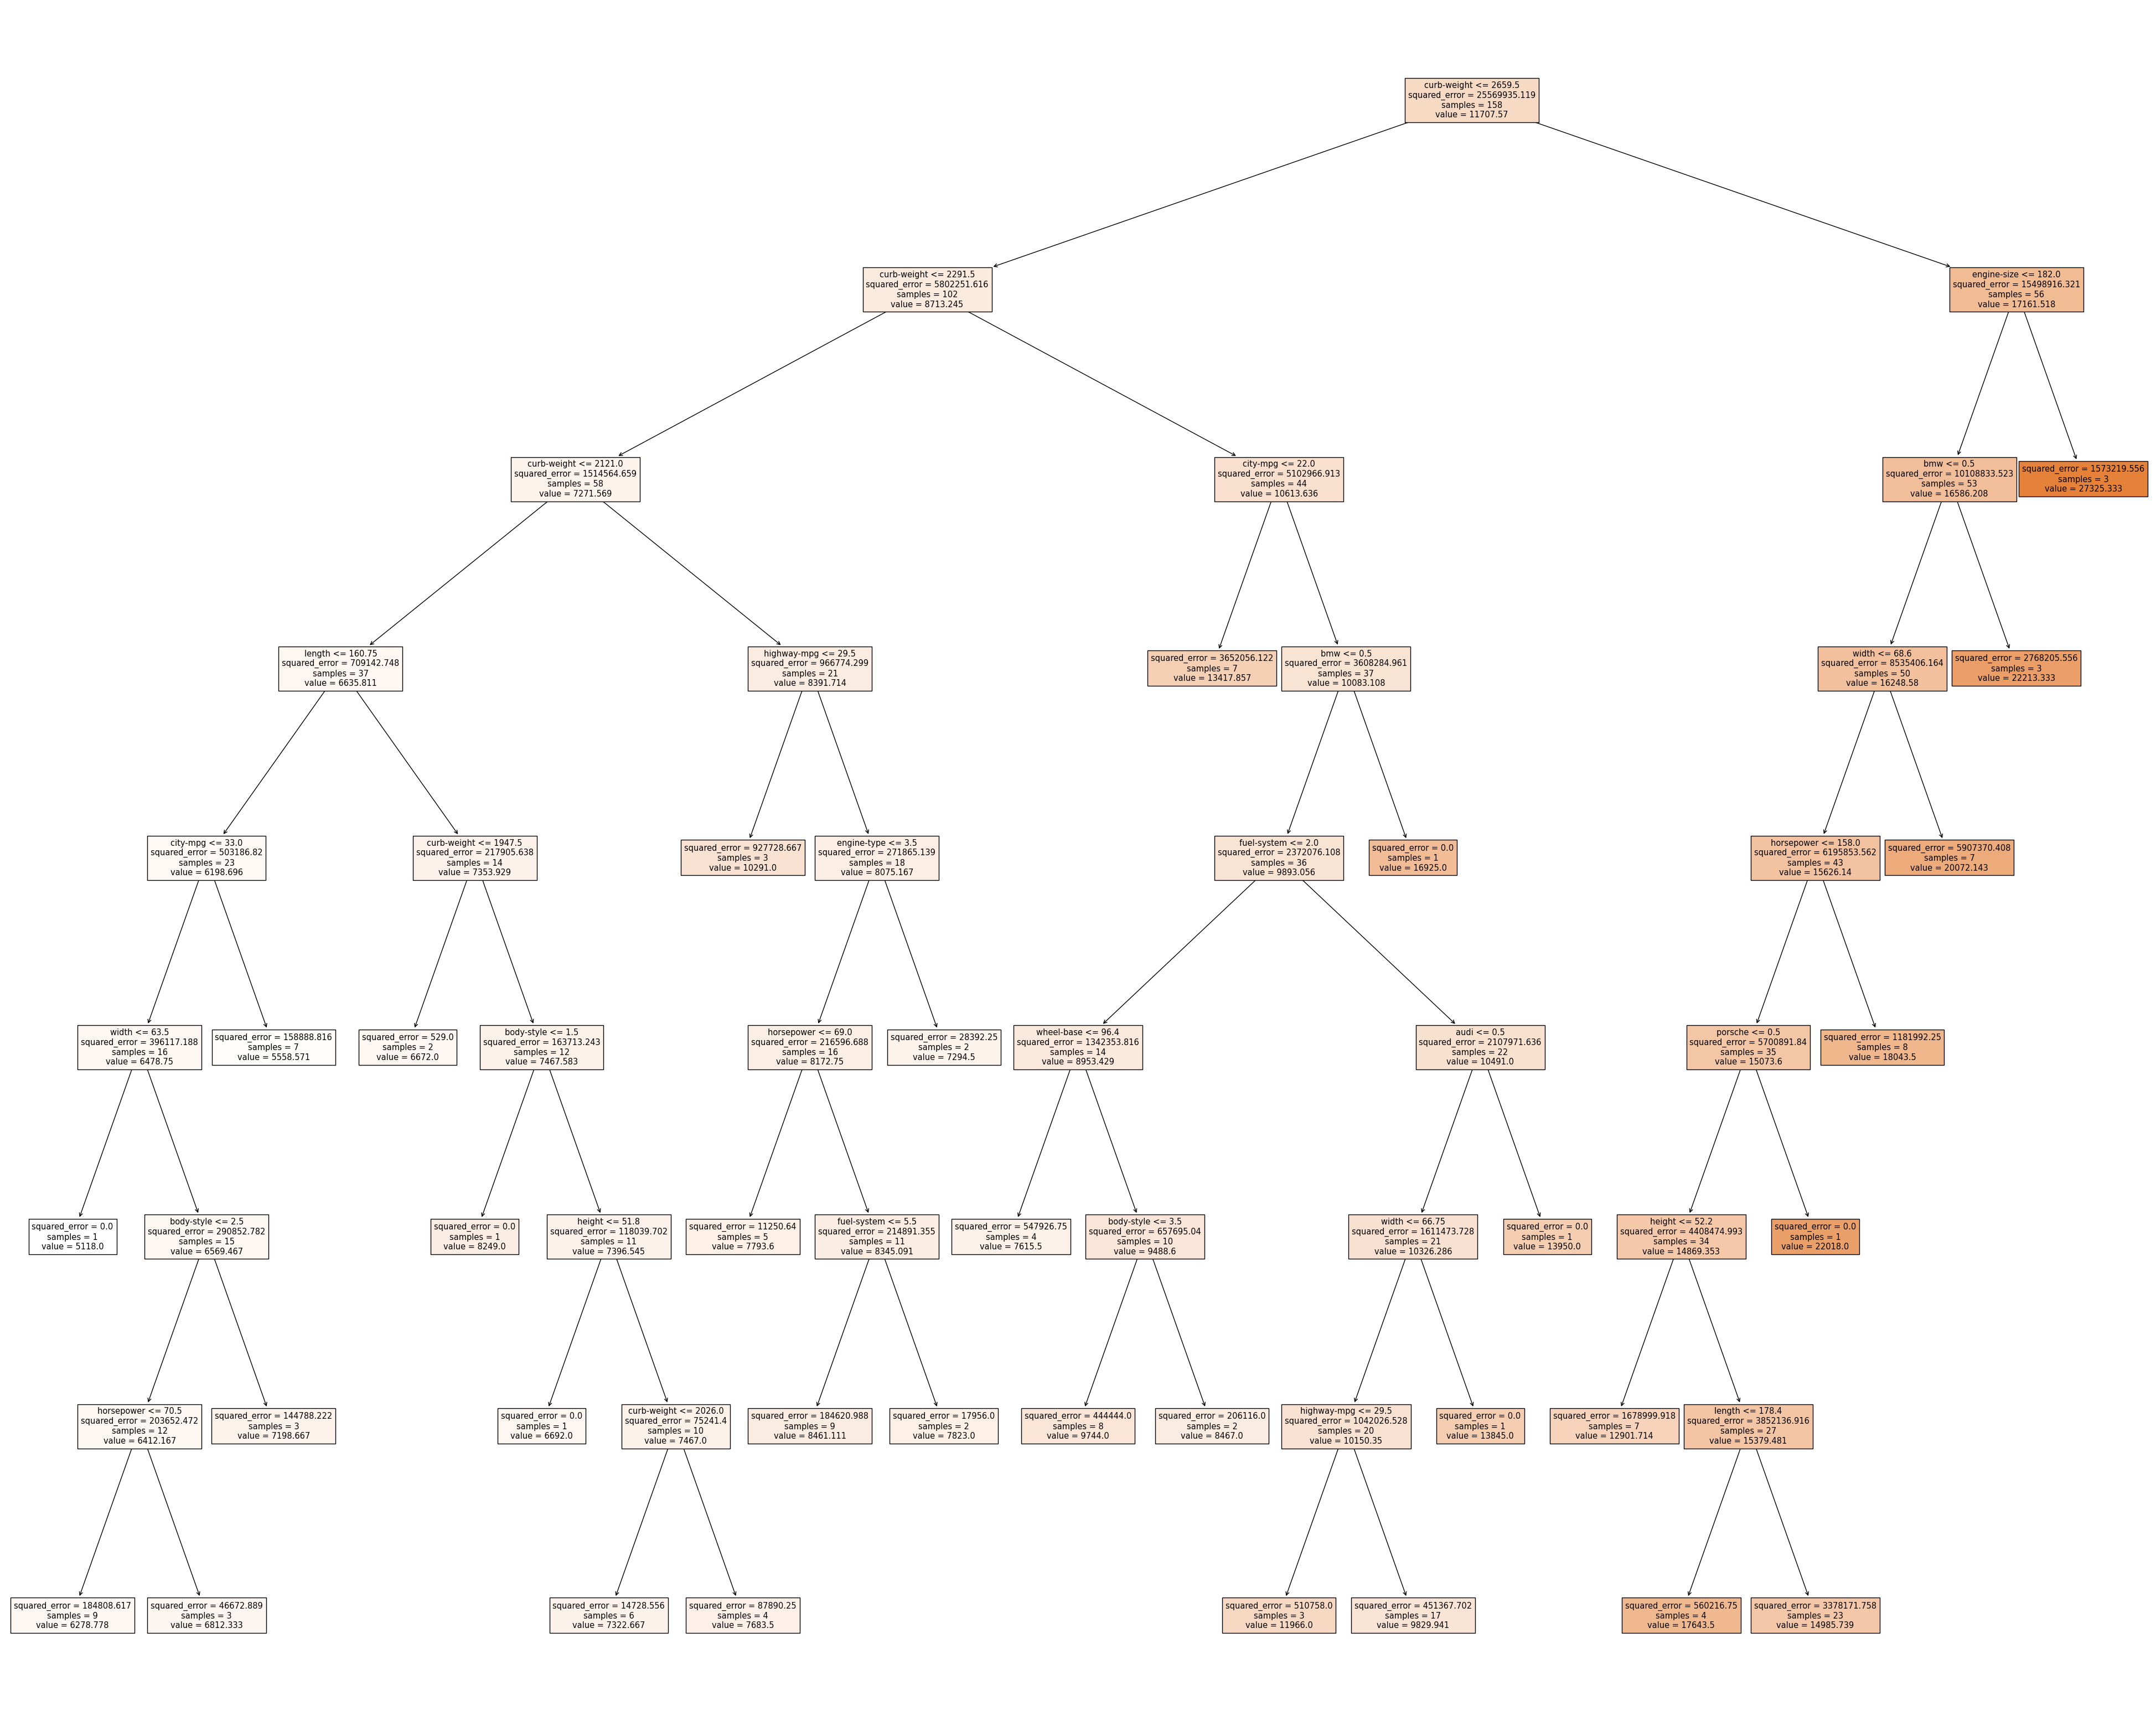

In [81]:
fig = plt.figure(figsize=(50,40), dpi=100)
tree_plot = tree.plot_tree(tree_model_best, feature_names=X.columns, filled=True)

In [82]:
# Checking the effectiveness of the model

pred_tree_best_val = tree_model_best.predict(X_val)     # Prediction for the training set - prediction for the observations that our model saw during training
pred_tree_best_test = tree_model_best.predict(X_test)       # Prediction for test set - prediction for observations that our model did NOT see during training

print('Validation set')
print('R2 Score:')
print(r2_score(y_val, pred_tree_best_val))
print('MAE')
print(mean_absolute_error(y_val, pred_tree_best_val))

print()
print('Test set')
print('R2 Score:')
print(r2_score(y_test, pred_tree_best_test))
print('MAE')
print(mean_absolute_error(y_test, pred_tree_best_test))

print()
print('Prediction for unknown prices')
print(tree_model_best.predict(X_price_na))

Validation set
R2 Score:
0.94721334274642
MAE
889.7960691704218

Test set
R2 Score:
0.779061199042337
MAE
1217.1219327311135

Prediction for unknown prices
[18043.5         5558.57142857  5558.57142857 27325.33333333]
